## CONTROLLED MONTH  "VS"   TESTED MONTH

In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

SELECT Timestamp,watt FROM watt.watt_month  WHERE Timestamp >= '2016-09-04 00:00:00'   AND Timestamp <= '2016-09-10 23:45:00'; 
SELECT Timestamp,watt FROM watt.watt_month_1 WHERE Timestamp >= '2016-10-02 00:00:00'   AND Timestamp <= '2016-10-08 23:45:00'; 


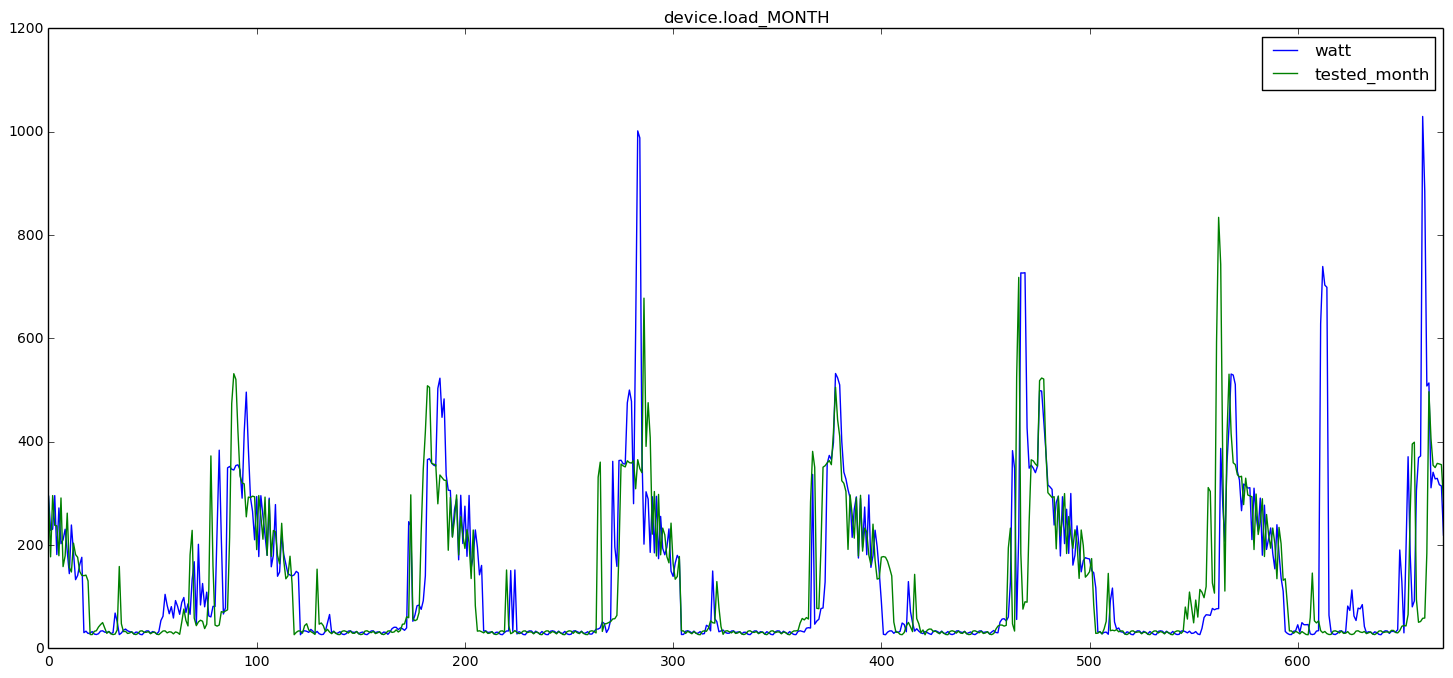

In [4]:
d = 7
time_a = pd.date_range('2016-09-04 00:00:00', periods=96*d, freq='15T')
# # print time_a
time_b = pd.date_range('2016-09-04 00:14:59', periods=96*d, freq='15T')
# # print time_b

time_a_1 = pd.date_range('2016-10-02 00:00:00', periods=96*d, freq='15T')
time_b_1 = pd.date_range('2016-10-02 00:14:59', periods=96*d, freq='15T')

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query16 = "SELECT Timestamp,watt FROM watt.watt_month  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_a[(96*d)-1])
df = pd.read_sql(query16, conn )
print query16


query17 = "SELECT Timestamp,watt FROM watt.watt_month_1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a_1[0],time_a_1[(96*d)-1])
df1 = pd.read_sql(query17, conn )
print query17
df['tested_month']=df1.watt

fig, ax = plt.subplots(figsize=(9*2, 4*2))
ax.set_title('device.load_MONTH')


df.plot(ax=ax )
plt.show()